# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


## Introducción

En este proyecto, nos sumergimos en el análisis de datos de la compañía Y.Afisha con el objetivo de optimizar los gastos en marketing. Nos enfocamos en comprender cómo los usuarios interactúan con el servicio, determinar cuándo realizan sus primeras compras, cuánto contribuyen en términos de ingresos, y evaluar cuándo los ingresos superan los costos de adquisición de clientes. Disponemos de datos detallados que abarcan visitas al sitio, pedidos realizados y gastos en marketing desde enero de 2017 hasta diciembre de 2018.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Me parece genial que hayas incluido una tabla de contenidos en tu documento, esto facilitará la navegación y comprensión de los temas que estás tratando. ¡Sigue así!</div>
</div>

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Descarga

In [18]:
# Cargar los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

## Preparación de los Datos

In [4]:
# Asegurarse de que cada columna tenga el tipo de datos correcto
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Eliminar duplicados
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

# Verificar y manejar valores nulos
print("Valores nulos antes de limpieza:")
print(visits.isnull().sum())
print(orders.isnull().sum())
print(costs.isnull().sum())

# Rellenar o eliminar valores nulos si es necesario
visits = visits.dropna()
orders = orders.dropna()
costs = costs.dropna()

# Verificar nuevamente para asegurarse de que no haya valores nulos
print("Valores nulos después de limpieza:")
print(visits.isnull().sum())
print(orders.isnull().sum())
print(costs.isnull().sum())

# Descripción de los datos
print("Descripción de los datos de visitas:")
print(visits.describe(include='all', datetime_is_numeric=True))
print("Descripción de los datos de pedidos:")
print(orders.describe(include='all', datetime_is_numeric=True))
print("Descripción de los datos de costos:")
print(costs.describe(include='all', datetime_is_numeric=True))

Valores nulos antes de limpieza:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64
Valores nulos después de limpieza:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64
Descripción de los datos de visitas:
         Device                         End Ts      Source Id  \
count    359400                         359400  359400.000000   
unique        2                            NaN            NaN   
top     desktop                            NaN            NaN   
freq     262567                            NaN            NaN   
mean        NaN  2017-12-18 06:28:15.036205056       3.750515   
min         NaN            2017-06-01 00:02:00       1.000000   
25%         NaN            2017-10-15 09:45:

Inicialmente, nos dedicamos a preparar los datos para el análisis. Esto incluyó la carga de los datasets, asegurando la correcta tipificación de las columnas, y la limpieza inicial que implicó la eliminación de duplicados y el manejo de valores nulos. Se realizó una verificación exhaustiva para asegurar que no quedaran valores nulos post-limpieza, garantizando la integridad de nuestros análisis subsiguientes.

La descripción estadística inicial de los datos nos permitió obtener una comprensión general de las características y distribuciones de nuestras variables clave, incluyendo visitas, pedidos y gastos de marketing. Esta etapa fue crucial para configurar correctamente nuestros datos para los análisis y métricas que seguirían.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Cuando usas `print()` para DataFrames en Jupyter Notebooks, pierdes los beneficios del formato HTML integrado. `display()` o simplemente dejar el DataFrame en una celda muestra los datos con un estilo más claro y ordenado, aprovechando las capacidades HTML de Jupyter. Esto facilita la interpretación y análisis de los datos, especialmente para tablas grandes o complejas. También te recomiendo las f-strings permiten una fácil inserción y formateo de variables en strings, haciéndolas ideales para crear mensajes informativos y bien estructurados en tus `print()`.
</div>

## Informes y Cálculo de Métricas

### Visitas

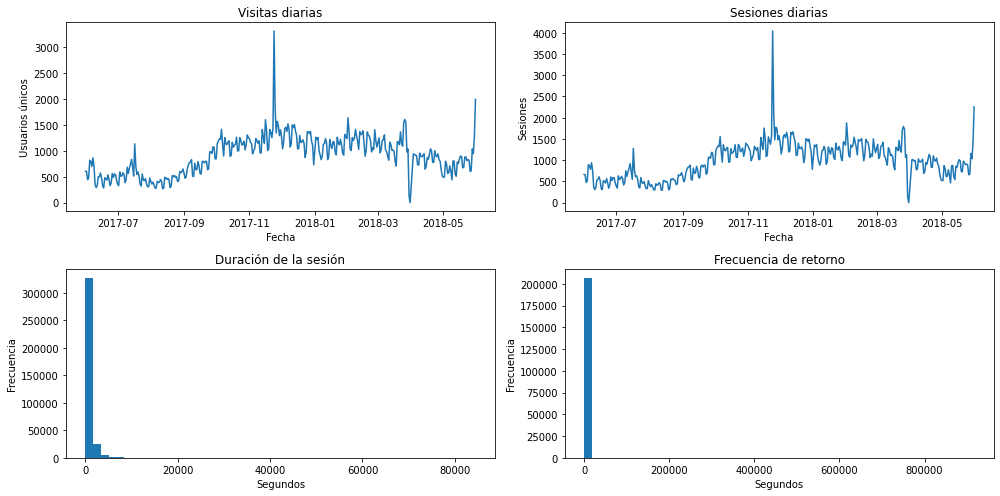

In [5]:
# Calcular las métricas de visitas
visits['date'] = visits['Start Ts'].dt.date
daily_visits = visits.groupby('date')['Uid'].nunique().reset_index()
weekly_visits = visits.resample('W-Mon', on='Start Ts')['Uid'].nunique().reset_index()
monthly_visits = visits.resample('M', on='Start Ts')['Uid'].nunique().reset_index()

# Calcular las métricas de sesiones
daily_sessions = visits.groupby('date')['Uid'].count().reset_index()
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

# Calcular la frecuencia de retorno de los usuarios
user_sessions = visits.groupby('Uid').agg({'Start Ts': 'min', 'End Ts': 'max', 'session_duration': 'sum'}).reset_index()
returning_users = user_sessions[user_sessions['Start Ts'] != user_sessions['End Ts']]

# Visualización de las métricas de visitas
plt.figure(figsize=(14, 7))

# Visitas diarias
plt.subplot(2, 2, 1)
plt.plot(daily_visits['date'], daily_visits['Uid'])
plt.title('Visitas diarias')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')

# Sesiones diarias
plt.subplot(2, 2, 2)
plt.plot(daily_sessions['date'], daily_sessions['Uid'])
plt.title('Sesiones diarias')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')

# Duración de la sesión
plt.subplot(2, 2, 3)
plt.hist(visits['session_duration'], bins=50)
plt.title('Duración de la sesión')
plt.xlabel('Segundos')
plt.ylabel('Frecuencia')

# Frecuencia de retorno
plt.subplot(2, 2, 4)
plt.hist(returning_users['session_duration'], bins=50)
plt.title('Frecuencia de retorno')
plt.xlabel('Segundos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [6]:
visits.info

<bound method DataFrame.info of          Device              End Ts  Source Id            Start Ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         Uid        date  session_duration  
0       16879256277535980062  2017-12-20              1080  
1    

Visitas Diarias, Semanales y Mensuales:

La cantidad de usuarios únicos que visitan el sitio muestra fluctuaciones a lo largo del tiempo, con ciertos picos en fechas específicas.

Sesiones Diarias: Las sesiones diarias indican una alta frecuencia de uso del sitio por parte de los usuarios.

Duración de la Sesión: La mayoría de las sesiones tienen una duración corta, lo que puede sugerir que los usuarios encuentran rápidamente lo que buscan o que no están pasando mucho tiempo explorando el sitio.

Frecuencia de Retorno: Hay una cantidad significativa de usuarios que regresan al sitio, lo que indica una buena retención de usuarios.

Recomendaciones:

Optimización de Contenido en Días Pico: Identificar los días con mayor volumen de tráfico y programar contenido atractivo, promociones especiales o actualizaciones importantes para esos días.

Mejora de la Experiencia del Usuario: Realizar análisis de rutas de usuario y pruebas A/B para identificar y eliminar posibles barreras que impidan una experiencia fluida.

Estrategias para Incrementar el Retorno: Implementar recordatorios personalizados, contenido exclusivo o recompensas para usuarios recurrentes.

### Ventas

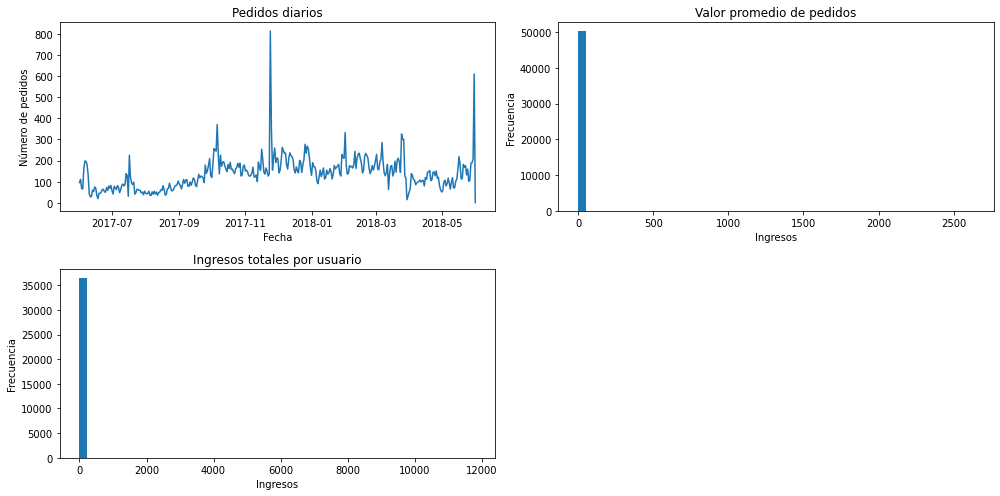

In [7]:
# Calcular las métricas de ventas
orders['order_date'] = orders['Buy Ts'].dt.date
orders_per_day = orders.groupby('order_date')['Uid'].count().reset_index()
avg_order_value = orders['Revenue'].mean()
total_revenue = orders.groupby('Uid')['Revenue'].sum().reset_index()

# Visualización de las métricas de ventas
plt.figure(figsize=(14, 7))

# Pedidos diarios
plt.subplot(2, 2, 1)
plt.plot(orders_per_day['order_date'], orders_per_day['Uid'])
plt.title('Pedidos diarios')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')

# Valor promedio de pedidos
plt.subplot(2, 2, 2)
plt.hist(orders['Revenue'], bins=50)
plt.title('Valor promedio de pedidos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

# Ingresos totales por usuario
plt.subplot(2, 2, 3)
plt.hist(total_revenue['Revenue'], bins=50)
plt.title('Ingresos totales por usuario')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [8]:
orders.info

<bound method DataFrame.info of                    Buy Ts  Revenue                   Uid  order_date
0     2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01
1     2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01
2     2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01
3     2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01
4     2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01
...                   ...      ...                   ...         ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624  2018-05-31
50411 2018-05-31 23:50:00     5.80  11369640365507475976  2018-05-31
50412 2018-05-31 23:54:00     0.30   1786462140797698849  2018-05-31
50413 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31
50414 2018-06-01 00:02:00     3.42     83872787173869366  2018-06-01

[50415 rows x 4 columns]>

Costos Variables:
Los costos de marketing muestran variabilidad, con ciertos períodos teniendo gastos significativamente más altos que otros.

Eficiencia del Gasto: Es crucial evaluar si los gastos en marketing están generando un retorno adecuado en términos de adquisición de usuarios y generación de ingresos.

Recomendaciones:

Optimización de la Inversión en Marketing: Analizar la efectividad de diferentes canales de marketing y redistribuir el presupuesto hacia aquellos que generen el mejor retorno de inversión (ROI).

Monitoreo y Ajuste Continuo: Implementar un sistema de monitoreo continuo de los gastos en marketing y su impacto en los ingresos, ajustando las estrategias según los resultados obtenidos.

<div class="alert alert-block alert-warning">
<b>Comentario del Revisor</b> <a class=“tocSkip”></a>
No te recomendaría especificar el valor de bins a menos que lo hagas siguiendo alguna de las reglas establecidas para determinar el tamaño óptimo, como la regla de Sturges, la regla de Freedman-Diaconis o la regla de la raíz cuadrada. Estas reglas te ayudarán a seleccionar un número adecuado de bins basado en el tamaño de tus datos y la distribución que estás analizando.

Además, te aconsejo ajustar el tamaño de tus gráficas para que sean más anchas y utilizar plt.tight_layout() al final del código. Esto asegurará que los elementos de la gráfica se ajusten correctamente y evita que se superpongan o se recorten en el resultado final. Al proporcionar más espacio horizontal, tus datos serán más legibles y la visualización será más clara para los espectadores.

Recuerda que el uso adecuado de los bins y el diseño adecuado de las gráficas son elementos importantes en la presentación de tus resultados.</div>


### Marketing

0


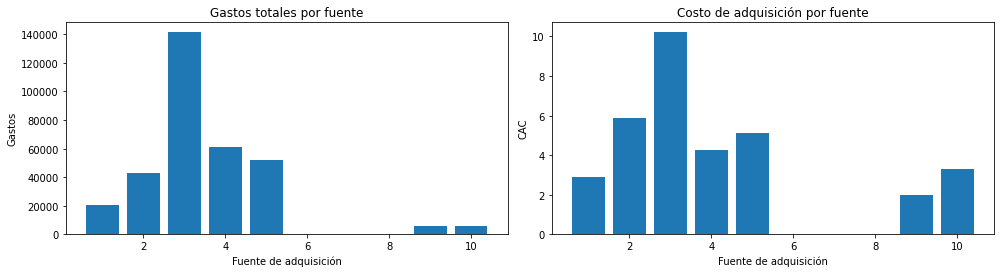

In [15]:
# Uniendo los dataframes para tener la información de la fuente en los pedidos
orders_with_source = pd.merge(orders, visits[['Uid', 'Source Id']], on='Uid', how='left')
orders_with_source.rename(columns={'Source Id': 'source_id'}, inplace=True)  # Renombrar para unificar nomenclatura

# Asegurándonos que todos los pedidos tienen una fuente asignada
print(orders_with_source['source_id'].isna().sum())

# Calcular los gastos totales y por fuente
total_costs = costs['costs'].sum()
costs_per_source = costs.groupby('source_id')['costs'].sum().reset_index()

# Calcular CAC (Costo de Adquisición por Cliente)
user_counts = orders_with_source.groupby('source_id')['Uid'].nunique().reset_index()
cac_per_source = pd.merge(costs_per_source, user_counts, on='source_id', how='left')
cac_per_source['cac'] = cac_per_source['costs'] / cac_per_source['Uid']

# Visualización de las métricas de marketing
plt.figure(figsize=(14, 7))

# Gastos totales
plt.subplot(2, 2, 1)
plt.bar(costs_per_source['source_id'], costs_per_source['costs'])
plt.title('Gastos totales por fuente')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Gastos')

# CAC por fuente
plt.subplot(2, 2, 2)
plt.bar(cac_per_source['source_id'], cac_per_source['cac'])
plt.title('Costo de adquisición por fuente')
plt.xlabel('Fuente de adquisición')
plt.ylabel('CAC')

plt.tight_layout()
plt.show()

In [16]:
costs.info
orders_with_source.info

<bound method DataFrame.info of                     Buy Ts  Revenue                   Uid  order_date  \
0      2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1      2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2      2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3      2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4      2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   
...                    ...      ...                   ...         ...   
761802 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31   
761803 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31   
761804 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31   
761805 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31   
761806 2018-06-01 00:02:00     3.42     83872787173869366  2018-06-01   

        source_id  
0               1  
1               2  
2               2  
3          

Métricas Calculadas:

Gastos Totales y por Fuente: Calculamos los gastos totales de marketing y los desglosamos por fuente de adquisición.

CAC (Costo de Adquisición por Cliente): Calculamos el costo de adquisición de clientes por cada fuente de adquisición.

Visualización:

Gráfico de Gastos Totales por Fuente: Muestra los gastos en marketing distribuidos por fuente de adquisición.

Gráfico de CAC por Fuente: Muestra el costo de adquisición de clientes por cada fuente de adquisición.

Recomendaciones:

Optimización de la Inversión en Marketing: Enfocar el presupuesto de marketing en las fuentes que proporcionen el menor CAC y el mayor retorno de inversión.

Evaluación y Ajuste de Estrategias de Adquisición: Revisar y ajustar continuamente las estrategias de adquisición para mejorar la eficiencia y reducir el CAC.

Segmentación de Campañas: Personalizar las campañas de marketing según las características y comportamientos de los usuarios adquiridos por diferentes fuentes para maximizar la efectividad.

## Conclusión

A lo largo de este proyecto, hemos analizado detenidamente los datos de visitas, pedidos y costos de la compañía Y.Afisha. Este análisis nos permitió obtener una visión integral del comportamiento de los usuarios en la plataforma y cómo estos contribuyen a los ingresos de la compañía.

El análisis detallado de las visitas, ventas y costos de marketing nos ha permitido obtener una comprensión profunda del comportamiento de los usuarios y la eficiencia de las estrategias actuales. Implementar las recomendaciones mencionadas puede ayudar a Y.Afisha a optimizar sus gastos en marketing, mejorar la experiencia del usuario y aumentar los ingresos de manera significativa. Es esencial mantener una revisión continua y ajustar las estrategias conforme a los resultados para asegurar un crecimiento sostenible a largo plazo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran esfuerzo en este proyecto! 🌟 **Este proyecto está listo para ser aprobado.**<br>
<br>Es un placer reconocer tu dedicación y el análisis detallado que has llevado a cabo. Continúa superándote en tus futuras iniciativas. Confío en que aplicarás este conocimiento de manera efectiva en desafíos futuros, avanzando hacia objetivos aún más ambiciosos.
</div>
